#**Exploratory Data Analysis on the US Wildfires (1.88 Million Data) from 1992~2015**

version: us-wildfire-eda-project-v6

---



![Imgur](https://i.imgur.com/J6hQbFU.jpg)

In [ ]:
!pip install jovian --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 KB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
!pip install numpy pandas-profiling jovian --quiet

## **Outline, Introduction & About the Data** 


### **Table of Contents**
*  Outline, Overview & About the Data
*  Data Preparation & Cleaning
*  Exploratory Analysis & Visualization
*  Questions & Answers
*  Summary & Credits


### **Overview**
As an avid outdoor enthusiast, I make it a point to plan at least one backpacking trip to the Sierra Nevada region in California every year. While September is typically the ideal time for such an excursion, as it marks the end of the scorching summer heat and the pesky mosquitoes start to dissipate, it is also the time when the risk of wildfires peaks. Over the years, I have observed a marked increase in the frequency and scale of wildfires, making it increasingly challenging to plan my annual trips. To gain a better understanding of this phenomenon, I have decided to analyze the US wildfire dataset from 1992 to 2015. This will help me answer some pertinent questions, such as whether global warming is exacerbating the wildfire problem, particularly in California.

### **About the Data: US Wildfires from 1992~2015**
The 1.88 million US wildfire dataset, spanning from 1992 to 2015, is part of the national Fire Program Analysis (FPA) system. The data was provided by federal, state, and local government agencies and includes core information such as discovery date, final fire size, and a precise location within a Public Land Survey System (PLSS) section (a 1-square mile grid). The dataset covers 140 million acres that were burned during the 24-year period.

However, since our focus is on the specifics of the wildfires and not on the agencies that collect the data, we will remove a significant portion of the data that pertains to the latter. Additionally, the dataset was originally stored as an SQL database and contains numerous secondary keys, which we will eliminate as well. We invite you to examine the 39 columns and metadata associated with the 'Fires' dataset.


#### **Meta Data:**

**Fires** dataset includes wildfire data for the period of 1992-2015 compiled from US federal, state, and local reporting systems. 
Here are the columns for this table:
* FOD_ID = Global unique identifier.
* FPA_ID = Unique identifier that contains information necessary to track back to the original record in the source dataset.
* SOURCESYSTEMTYPE = Type of source database or system that the record was drawn from (federal, nonfederal, or interagency).
* SOURCESYSTEM = Name of or other identifier for source database or system that the record was drawn from. See Table 1 in Short (2014), or Supplements\FPAFODsourcelist.pdf, for a list of sources and their identifier.
* NWCGREPORTINGAGENCY = Active National Wildlife Coordinating Group (NWCG) Unit Identifier for the agency preparing the fire report .
* NWCGREPORTINGUNIT_ID = Active NWCG Unit Identifier for the unit preparing the fire report.
* NWCGREPORTINGUNIT_NAME = Active NWCG Unit Name for the unit preparing the fire report.
* SOURCEREPORTINGUNIT = Code for the agency unit preparing the fire report, based on code/name in the source dataset.
* SOURCEREPORTINGUNIT_NAME = Name of reporting agency unit preparing the fire report, based on code/name in the source dataset.
* LOCALFIREREPORT_ID = Number or code that uniquely identifies an incident report for a particular reporting unit and a particular calendar year.
* LOCALINCIDENTID = Number or code that uniquely identifies an incident for a particular local fire management organization within a particular calendar year.
* FIRE_CODE = Code used within the interagency wildland fire community to track and compile cost information for emergency fire suppression (https://www.firecode.gov/).
* FIRE_NAME = Name of the incident, from the fire report (primary) or ICS-209 report (secondary).
* ICS209INCIDENT_NUMBER = Incident (event) identifier, from the ICS-209 report.
* ICS209NAME = Name of the incident, from the ICS-209 report.
* MTBS_ID = Incident identifier, from the MTBS perimeter dataset.
* MTBSFIRENAME = Name of the incident, from the MTBS perimeter dataset.
* COMPLEX_NAME = Name of the complex under which the fire was ultimately managed, when discernible.
* FIRE_YEAR = Calendar year in which the fire was discovered or confirmed to exist.
* DISCOVERY_DATE = Date on which the fire was discovered or confirmed to exist.
* DISCOVERY_DOY = Day of year on which the fire was discovered or confirmed to exist.
* DISCOVERY_TIME = Time of day that the fire was discovered or confirmed to exist.
* STAT_CAUSE_CODE = Code for the (statistical) cause of the fire.
* STAT_CAUSE_DESCR = Description of the (statistical) cause of the fire.
* CONT_DATE = Date on which the fire was declared contained or otherwise controlled (mm/dd/yyyy where mm=month, dd=day, and yyyy=year).
* CONT_DOY = Day of year on which the fire was declared contained or otherwise controlled.
* CONT_TIME = Time of day that the fire was declared contained or otherwise controlled (hhmm where hh=hour, mm=minutes).
* FIRE_SIZE = Estimate of acres within the final perimeter of the fire.
* FIRE_SIZE_CLASS = Code for fire size based on the number of acres within the final fire perimeter expenditures (A=greater than 0 but less than or equal to 0.25 acres, B=0.26-9.9 acres, C=10.0-99.9 acres, D=100-299 acres, E=300 to 999 acres, F=1000 to 4999 acres, and G=5000+ acres).
* LATITUDE = Latitude (NAD83) for point location of the fire (decimal degrees).
* LONGITUDE = Longitude (NAD83) for point location of the fire (decimal degrees).
* OWNER_CODE = Code for primary owner or entity responsible for managing the land at the point of origin of the fire at the time of the incident.
* OWNER_DESCR = Name of primary owner or entity responsible for managing the land at the point of origin of the fire at the time of the incident.
* STATE = Two-letter alphabetic code for the state in which the fire burned (or originated), based on the nominal designation in the fire report.
* COUNTY = County, or equivalent, in which the fire burned (or originated), based on nominal designation in the fire report.
* FIPS_CODE = Three-digit code from the Federal Information Process Standards (FIPS) publication 6-4 for representation of counties and equivalent entities.
* FIPS_NAME = County name from the FIPS publication 6-4 for representation of counties and equivalent entities.
* NWCGUnitIDActive20170109: Look-up table containing all NWCG identifiers for agency units that were active (i.e., valid) as of 9 January 2017, when the list was downloaded from https://www.nifc.blm.gov/unit_id/Publish.html and used as the source of values available to populate the following fields in the Fires table: NWCGREPORTINGAGENCY, NWCGREPORTINGUNITID, and NWCGREPORTINGUNITNAME.
* UnitId = NWCG Unit ID.
* GeographicArea = Two-letter code for the geographic area in which the unit is located (NA=National, IN=International, AK=Alaska, CA=California, EA=Eastern Area, GB=Great Basin, NR=Northern Rockies, NW=Northwest, RM=Rocky Mountain, SA=Southern Area, and SW=Southwest).
* Gacc = Seven or eight-letter code for the Geographic Area Coordination Center in which the unit is located or primarily affiliated with .
* WildlandRole = Role of the unit within the wildland fire community.
* UnitType = Type of unit (e.g., federal, state, local).
* Department = Department (or state/territory) to which the unit belongs .
* Agency = Agency or bureau to which the unit belongs .
* Parent = Agency subgroup to which the unit belongs (A concatenation of State and Unit from this report - https://www.nifc.blm.gov/unit_id/publish/UnitIdReport.rtf).
* Country = Country in which the unit is located (e.g. US = United States).
* State = Two-letter code for the state in which the unit is located (or primarily affiliated).
* Code = Unit code (follows state code to create UnitId).
* Name = Unit name.




### **Downloading the dataset from Kaggle**


Install opendatasets & download the dataset

In [ ]:
!pip install opendatasets --quiet

In [ ]:
import opendatasets as od

# the dataset exists as a SQL database.
dataset_url = 'https://www.kaggle.com/datasets/rtatman/188-million-us-wildfires?select=FPA_FOD_20170508.sqlite'
od.download(dataset_url)

Skipping, found downloaded files in "./188-million-us-wildfires" (use force=True to force download)


In [ ]:
import os
file_name = "/content/188-million-us-wildfires/FPA_FOD_20170508.sqlite"
file_stats = os.stat(file_name)
print(file_stats)
print(f'File Size in MegaBytes is {file_stats.st_size / (1024 * 1024)}')

os.stat_result(st_mode=33188, st_ino=6291758, st_dev=47, st_nlink=1, st_uid=0, st_gid=0, st_size=795785216, st_atime=1678765754, st_mtime=1678765766, st_ctime=1678765766)
File Size in MegaBytes is 758.919921875


The dataset exists as SQL database with total size of 759MB.

#### **Data of the Interest:**
As previously mentioned, the dataset includes information on the agencies that collected the data and numerous secondary keys from the SQL database. We will remove this information and only utilize the following 12 selected columns for our analysis:

FOD_ID	
FIRE_NAME	
DISCOVERY_DATE	
DISCOVERY_TIME	
STAT_CAUSE_DESCR	
CONT_DATE	
FIRE_SIZE	
FIRE_SIZE_CLASS	
LATITUDE	
LONGITUDE	
STATE	
COUNTY 



## **Data Preparation & Cleaning**


### **Importing & Loading as Panda dataframe:** 
Since the data exists as SQL database, Sqlite3 and Panda libraries will be used to import and convert the data into Panda dataframe format.

In [ ]:
import sqlite3
import numpy as np
import pandas as pd

# Create a SQL connection to our SQLite database
con = sqlite3.connect("/content/188-million-us-wildfires/FPA_FOD_20170508.sqlite")

fires_df = pd.read_sql_query("SELECT FOD_ID, FIRE_NAME, DISCOVERY_DATE, DISCOVERY_TIME, STAT_CAUSE_DESCR, CONT_DATE, FIRE_SIZE, FIRE_SIZE_CLASS, LATITUDE, LONGITUDE, STATE, COUNTY from fires", con)

con.close()

In [ ]:
fires_df.head()

,FOD_ID,FIRE_NAME,DISCOVERY_DATE,DISCOVERY_TIME,STAT_CAUSE_DESCR,CONT_DATE,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY
0,1,FOUNTAIN,2453403.5,1300,Miscellaneous,2453403.5,0.10,A,40.036944,-121.005833,CA,63
1,2,PIGEON,2453137.5,0845,Lightning,2453137.5,0.25,A,38.933056,-120.404444,CA,61
2,3,SLACK,2453156.5,1921,Debris Burning,2453156.5,0.10,A,38.984167,-120.735556,CA,17
3,4,DEER,2453184.5,1600,Lightning,2453189.5,0.10,A,38.559167,-119.913333,CA,3
4,5,STEVENOT,2453184.5,1600,Lightning,2453189.5,0.10,A,38.559167,-119.933056,CA,3


In [ ]:
fires_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 12 columns):
 #   Column            Dtype  
---  ------            -----  
 0   FOD_ID            int64  
 1   FIRE_NAME         object 
 2   DISCOVERY_DATE    float64
 3   DISCOVERY_TIME    object 
 4   STAT_CAUSE_DESCR  object 
 5   CONT_DATE         float64
 6   FIRE_SIZE         float64
 7   FIRE_SIZE_CLASS   object 
 8   LATITUDE          float64
 9   LONGITUDE         float64
 10  STATE             object 
 11  COUNTY            object 
dtypes: float64(5), int64(1), object(6)
memory usage: 172.2+ MB


The dataset after selectively importing the columns is now 172.2MB in size. 

###**Data Preparation**  


#### **Column Names to Lower Cases**


In [ ]:
fires_df.columns= fires_df.columns.str.lower()

#### **Imputing Null Values**
We examine the issueof null values.  More than half of the fires are not named or have the data of fire discovery & containment dates recorded.  It is suspected that certain fires are considered insignficant or to remote to keep track of detailed information.  

In [ ]:
fires_df.isna().sum()

fod_id                   0
fire_name           957189
discovery_date           0
discovery_time      882638
stat_cause_descr         0
cont_date           891531
fire_size                0
fire_size_class          0
latitude                 0
longitude                0
state                    0
county              678148
dtype: int64

We will filter out the smaller size fires and re-exam in the issue of missing data.

>According to the metadata, "FIRE_SIZE_CLASS" codes are defined as:
- A=greater than 0 but less than or equal to 0.25 acres, 
- B=0.26-9.9 acres
- C=10.0-99.9 acres
- D=100-299 acres
- E=300 to 999 acres
- F=1000 to 4999 acres
- G=5000+ acres


In [ ]:
fires_df[fires_df['fire_size_class'].isin(['F','G'])].isna().sum()

fod_id                 0
fire_name            879
discovery_date         0
discovery_time      2269
stat_cause_descr       0
cont_date           2536
fire_size              0
fire_size_class        0
latitude               0
longitude              0
state                  0
county              5231
dtype: int64

**Analysis:** When we filtered out the number of un-named fires by the Fire Size Class (defined as the final fire perimeter or 'burned area') of less than 1,000 acres of fire burned area, the number of missing data in 'fire_name' column is reduced by 99.9%. Moreover, one can reasonably assumed that missing values in 'discovery_time', 'cont_date', and 'county' are all associated with 'fire_name', i.e. smaller fires are not named or kept recorded in detail.


Missing data does not pose any significant issue for our analysis.  Nonetheless, the null values will be replaced in the following manner:
- Missing 'fire_name' will be repalced by 'NO_NAME'
- Missing 'discovery_time' will be replaced by the mean value
- Missing 'cont_date' will be replaced by the average difference between the *known* 'discovery_date' and 'cont_date' within the same fire_size_class
- Missing 'county' will be replaced by 'UNKNOWN' 


In [ ]:
# 'missing 'fire_name' & 'county' replacement
fires_df["fire_name"].fillna("NO_NAME", inplace = True)
fires_df["county"].fillna("UNKNOWN", inplace = True)

In [ ]:
# we conver the 'discovery_time' (dtype = object) as float64
fires_df['discovery_time'] = pd.to_numeric(fires_df['discovery_time'], errors='coerce')

In [ ]:
fires_df.discovery_time.sample(10)

860636        NaN
1100109       NaN
1825719    1405.0
1147430    1521.0
357917     1600.0
1217003    1534.0
1323444    1527.0
676127        NaN
313914     1525.0
554057        NaN
Name: discovery_time, dtype: float64

In [ ]:
#we convert the 'discovery_time' from object to int64 then fill in the null values with the mean value
fires_df['discovery_time'].fillna(fires_df['discovery_time'].mean(), inplace=True)

For convenience, we will create another column labeled '**burn_days**' which is the difference between the fire 'discovery_date' and the 'cont_date' or the containment date.  Then the average of 'burn_days' group by the 'fire_size_class' will be calculated.  This average will be added to the *fire* 'discovery_date' to approximate the *fire* 'cont_date'. 

In [ ]:
#calculating the day difference between the discovery_date and cont_date as an approximation for burning days.
fires_df['burn_days'] = fires_df.cont_date - fires_df.discovery_date

In [ ]:
fires_df.sample(10)

,fod_id,fire_name,discovery_date,discovery_time,stat_cause_descr,cont_date,fire_size,fire_size_class,latitude,longitude,state,county,burn_days
406206,440010,NO_NAME,2453186.5,1453.014326,Lightning,NaN,7.0,B,29.323610,-81.510830,FL,Volusia,NaN
122125,123344,SPRINGS,2451370.5,1829.000000,Lightning,2451386.5,3.0,B,36.961667,-118.943333,CA,UNKNOWN,16.0
140359,141736,RED MOUNTAIN,2452140.5,1500.000000,Lightning,2452142.5,2.0,B,48.883333,-115.358333,MT,UNKNOWN,2.0
1234303,1636612,ATCHISON,2454579.5,1310.000000,Miscellaneous,2454579.5,0.1,A,35.002500,-110.599300,AZ,UNKNOWN,0.0
199467,202141,ELAKE,2450124.5,1500.000000,Debris Burning,2450124.5,0.5,B,35.080600,-108.831200,NM,UNKNOWN,0.0
1646686,201775299,TIPPY TOE,2456461.5,1700.000000,Arson,2456461.5,1.0,B,47.989700,-98.998500,ND,UNKNOWN,0.0
207142,209886,MARTIN,2449834.5,2046.000000,Children,2449834.5,0.5,B,33.345100,-110.457300,AZ,UNKNOWN,0.0
448181,482408,NO_NAME,2454165.5,1453.014326,Debris Burning,NaN,4.3,B,33.236749,-85.186147,GA,Heard,NaN
1782895,300138943,NO_NAME,2456853.5,1416.000000,Miscellaneous,NaN,18.3,C,32.786130,-93.691700,LA,Bossier,NaN
596966,644637,NO_NAME,2454489.5,1453.014326,Miscellaneous,NaN,0.5,B,35.475500,-87.761030,TN,Williamson,NaN


Note that the calculation of 'burn_days' will result in null value where the 'cont_date' is also null value. The null values of 'burn_days' will replace with the 'average burn days' of its respective Fire Size Class

In [ ]:
# calculating the average burn days grouped by the fire_size_class, and converting into a dictionary
avg_burn_days = fires_df.groupby('fire_size_class')['burn_days'].mean().to_dict()
# the values are rounded off to whole number
avg_burn_days = {key: round(avg_burn_days[key],0) for key in avg_burn_days}
avg_burn_days

{'A': 1.0, 'B': 1.0, 'C': 1.0, 'D': 4.0, 'E': 7.0, 'F': 14.0, 'G': 32.0}

In a newly created temporary hold-place column ('temp_col'), the null value replacements (the average fire size class of 'burn_days') will be stored and compare them against the exiting data to see if the methodology is fact correct.

In [ ]:
# replacing the null values of 'burn_days'
%%time
fires_df['temp_col'] = fires_df.apply(lambda x:
                                      x['burn_days'] 
                                      if pd.isna(x['burn_days']) == False
                                      else avg_burn_days[x['fire_size_class']], axis=1)


CPU times: user 27.1 s, sys: 382 ms, total: 27.5 s
Wall time: 29.5 s


In [ ]:
# drop the existing 'burn_days' column and rename the 'temp_col' to 'burn_days'
fires_df.drop('burn_days', axis=1, inplace=True)
fires_df.rename(columns={'temp_col':'burn_days'}, inplace=True)

In [ ]:
fires_df.sample(10)

,fod_id,fire_name,discovery_date,discovery_time,stat_cause_descr,cont_date,fire_size,fire_size_class,latitude,longitude,state,county,burn_days
406414,440220,NO_NAME,2453164.5,1453.014326,Lightning,NaN,3.00,B,28.236670,-82.593610,FL,Pasco,1.0
927529,1054935,NO_NAME,2452371.5,1453.014326,Arson,NaN,4.00,B,33.966700,-80.498300,SC,UNKNOWN,1.0
572026,617149,NO_NAME,2453310.5,1453.014326,Debris Burning,NaN,1.00,B,39.731110,-79.810010,PA,Fayette,1.0
1346935,1826723,NO_NAME,2452391.5,1642.000000,Miscellaneous,2452391.5,0.75,B,43.213783,-78.117738,NY,ORLEANS,0.0
290980,296461,SICKLE,2453697.5,1305.000000,Miscellaneous,2453697.5,5.00,B,36.130000,-98.560000,OK,UNKNOWN,0.0
535476,575984,NO_NAME,2454843.5,1453.014326,Miscellaneous,NaN,0.80,B,35.247000,-82.318830,NC,Polk,1.0
610234,658129,NO_NAME,2450183.5,1453.014326,Miscellaneous,NaN,1.00,B,30.693750,-94.293750,TX,Tyler,1.0
503847,541660,NO_NAME,2451292.5,1453.014326,Arson,NaN,0.50,B,46.823682,-95.824550,MN,Becker,1.0
446763,480981,NO_NAME,2454272.5,1453.014326,Equipment Use,NaN,0.11,A,32.041308,-82.963438,GA,Telfair,1.0
1381672,19077373,NO_NAME,2449362.5,1320.000000,Equipment Use,2449362.5,4.75,B,31.618700,-84.236500,GA,Dougherty,0.0


We will now add the newly estimated 'burn_days' to the discovery date to fill in the missing values in 'cont_date'.

In [ ]:
# we add the fire 'burn_days' to the fire 'discovery_date' to approximate the 'cont_date'
fires_df.cont_date = fires_df.discovery_date + fires_df.burn_days

In [ ]:
# checking to see if we have any null values.  If none, the methodology is done correctly.
fires_df[['discovery_date','cont_date']].sample(10)

,discovery_date,cont_date
669320,2453830.5,2453831.5
1447975,2450564.5,2450565.5
884926,2451281.5,2451282.5
1022543,2450698.5,2450699.5
464768,2453203.5,2453204.5
23106,2454305.5,2454306.5
894542,2451599.5,2451600.5
1454961,2455748.5,2455749.5
1237717,2451707.5,2451707.5
1031489,2451255.5,2451256.5


In [ ]:
fires_df.isna().sum()

fod_id              0
fire_name           0
discovery_date      0
discovery_time      0
stat_cause_descr    0
cont_date           0
fire_size           0
fire_size_class     0
latitude            0
longitude           0
state               0
county              0
burn_days           0
dtype: int64

We have removed all null values from the dataset

#### **Date Conversion**
Note the date information in 'DISCOVERY_DATE' & 'CONT_DATE' are in Julian date format.  These dates will be converted into Gregorian date format which we are more familiar. 

In [ ]:
fires_df['discovery_date'] = pd.to_datetime(fires_df['discovery_date'] - pd.Timestamp(0).to_julian_date(), unit='D')
fires_df['cont_date'] = pd.to_datetime(fires_df['cont_date'] - pd.Timestamp(0).to_julian_date(), unit='D')

#### **Parsing the Dates**  
For convenience, another columns of 'year', 'month', 'day' and 'weekday' are extracted from 'discovery_date' column. 

In [ ]:
fires_df['year'] = pd.DatetimeIndex(fires_df.discovery_date).year
fires_df['month'] = pd.DatetimeIndex(fires_df.discovery_date).month
fires_df['day'] = pd.DatetimeIndex(fires_df.discovery_date).day
fires_df['weekday'] = pd.DatetimeIndex(fires_df.discovery_date).weekday

In [ ]:
fires_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 17 columns):
 #   Column            Dtype         
---  ------            -----         
 0   fod_id            int64         
 1   fire_name         object        
 2   discovery_date    datetime64[ns]
 3   discovery_time    float64       
 4   stat_cause_descr  object        
 5   cont_date         datetime64[ns]
 6   fire_size         float64       
 7   fire_size_class   object        
 8   latitude          float64       
 9   longitude         float64       
 10  state             object        
 11  county            object        
 12  burn_days         float64       
 13  year              int64         
 14  month             int64         
 15  day               int64         
 16  weekday           int64         
dtypes: datetime64[ns](2), float64(5), int64(5), object(5)
memory usage: 243.9+ MB


In [ ]:
fires_df.sample(10)

,fod_id,fire_name,discovery_date,discovery_time,stat_cause_descr,cont_date,fire_size,fire_size_class,latitude,longitude,state,county,burn_days,year,month,day,weekday
1644099,201771806,BEAVER CREEK # 5,2013-07-03,1455.000000,Arson,2013-07-04,3.00,B,41.102200,-123.708900,CA,UNKNOWN,1.0,2013,7,3,2
1422519,19501285,NO_NAME,2009-07-14,1515.000000,Missing/Undefined,2009-07-15,6.00,B,31.484090,-92.500050,LA,Grant,1.0,2009,7,14,1
1238677,1641766,FY2000-LAURENS-146,2000-03-02,1608.000000,Debris Burning,2000-03-02,1.49,B,32.355300,-82.762100,GA,Laurens,0.0,2000,3,2,3
178318,180457,NANNA,1999-10-23,1515.000000,Debris Burning,1999-10-23,3.00,B,48.837800,-99.947400,ND,UNKNOWN,0.0,1999,10,23,5
1307634,1783221,NO_NAME,2006-12-20,1722.000000,Miscellaneous,2006-12-20,0.10,A,42.754202,-78.800509,NY,ERIE,0.0,2006,12,20,2
35109,35289,SEMAPHORE,2009-04-20,1430.000000,Debris Burning,2009-04-20,1.00,B,39.784722,-120.485556,CA,63,0.0,2009,4,20,0
422363,456360,NO_NAME,2005-01-19,1453.014326,Debris Burning,2005-01-20,3.35,B,32.165344,-83.221980,GA,Dodge,1.0,2005,1,19,2
461798,496137,NO_NAME,2009-09-30,1453.014326,Arson,2009-10-01,12.30,C,31.400016,-81.636215,GA,Glynn,1.0,2009,9,30,2
1601738,201621011,MADISON,2012-07-08,1923.000000,Miscellaneous,2012-07-08,2.00,B,39.030919,-89.725658,IL,Madison,0.0,2012,7,8,6
1545091,201401595,1744 CR 141,2010-08-28,1453.014326,Debris Burning,2010-08-29,1.00,B,31.919000,-98.170000,TX,Hamilton,1.0,2010,8,28,5


#### **Data Duplication** 
We will examine whether the dataset contains any duplicated data.  As shown below, the data does not contain any duplicated data. 

In [ ]:
fires_df.duplicated().sum()

0

#### **Data Accuracy** 
Let us check the data accuracy by randomly sampling five of top 100 fires, and cross check them against the p[ublicly available data.

In [ ]:
fires_df.sort_values(by=['fire_size'], ascending=False).head(100).sample(5, random_state=42)

,fod_id,fire_name,discovery_date,discovery_time,stat_cause_descr,cont_date,fire_size,fire_size_class,latitude,longitude,state,county,burn_days,year,month,day,weekday
132150,133460,CLEAR CREEK,2000-07-10,929.0,Lightning,2000-12-01,172135.0,G,45.221667,-114.4950,ID,UNKNOWN,144.0,2000,7,10,0
329088,336505,CRYSTAL,2006-08-15,235.0,Lightning,2006-09-10,220042.1,G,42.956900,-113.2411,ID,Bingham,26.0,2006,8,15,1
329223,336644,CLOVER,2005-07-15,1830.0,Lightning,2005-07-20,192846.1,G,42.628900,-115.5064,ID,Owyhee,5.0,2005,7,15,4
335657,344031,DUZAK,2005-06-22,1610.0,Lightning,2005-07-05,238058.0,G,37.200000,-114.3831,NV,Lincoln,13.0,2005,6,22,2
333977,342321,WINTERS,2006-07-25,953.0,Lightning,2006-08-03,238462.6,G,41.360300,-116.9144,NV,Elko,9.0,2006,7,25,1


> The random five samples (on the first run) from the largest 100 fires in the dataset are:
- Rodeo Fire of 2002 (fod_id: -24808)
- Clover Fire of 2005 (fod_id: 8964)
- Rush Fire of 2012 (fod_id: -21595)
- Minto Flats South Fire of 2009 (fod_id: 30673)
- Sadler Fire of 1999 (fod_id: -30182)


> Searching the internet to cross reference the above list of fires, all five were confirmed to be accurate in facts:
- Rodeo Fire of 2002: https://en.wikipedia.org/wiki/Rodeo%E2%80%93Chediski_Fire  (Rodeo Fire originally started out independently but later merged with Chediski Fire thus the name 'Rodeo-Chediski Fire'.)
>- Clover Fire of 2005: https://en.wikipedia.org/wiki/Clover_Fire 
- Rush Fire of 2012: https://en.wikipedia.org/wiki/Rush_Fire
- Minto Flats South Fire of 2009: https://en.wikipedia.org/wiki/Minto_Flats_South_Fire
- Sadler Fire of 1999: https://www.nwcg.gov/committee/6mfs/sadler-fire

### **Saving to csv file**

Before moving further, the dataset will be saved as csv file as a backup in the local computer and cloud. As a matter of data efficiency, we will predefine and reduce the data type.

In [ ]:
selected_dtypes = {
    'fod_id': 'int16',
    'discovery_time': 'float32',
    'fire_size': 'float32',
    'latitude': 'float32',
    'longitude': 'float32',
    'burn_days' : 'int16',
    'year': 'int16',
    'month': 'int16',
    'day': 'int16',
    'weekday': 'int16'
}

In [ ]:
fires_df.to_csv('us_wildfires.csv', index = False)

In [ ]:
import pandas as pd

fires_df = pd.read_csv(r'/content/us_wildfires.csv', dtype=selected_dtypes, parse_dates=['discovery_date', 'cont_date'], index_col = [0])


Let's example a few samples, data shape & information ofthe imported csv file to see if the csv savings & reading procedure is done accurately.  

In [ ]:
fires_df.sample(10)

,fod_id,fire_name,discovery_date,discovery_time,stat_cause_descr,cont_date,fire_size,fire_size_class,latitude,longitude,state,county,burn_days,year,month,day,weekday
758421,859967,KEG,1995-10-08,1453.014326,Smoking,1995-10-08,0.10,A,42.361020,-121.748910,OR,18,0.0,1995,10,8,6
1410000,19106035,NO_NAME,1994-09-05,1755.000000,Miscellaneous,1994-09-05,0.21,A,31.069700,-82.637000,GA,Clinch,0.0,1994,9,5,0
12366,12421,POTHOLE,2006-06-30,2039.000000,Lightning,2006-07-01,1.00,B,41.266667,-121.018056,CA,49,1.0,2006,6,30,4
1473817,201141009,NO_NAME,2011-01-30,1423.000000,Debris Burning,2011-01-30,0.10,A,32.859047,-81.237732,SC,Hampton County,0.0,2011,1,30,6
1448945,19971734,NO_NAME,1999-11-15,1453.014326,Equipment Use,1999-11-16,0.10,A,45.769827,-91.900571,WI,66,1.0,1999,11,15,0
1792091,300203382,CALAPOOYA,2015-07-04,1700.000000,Lightning,2015-07-05,0.10,A,43.388889,-122.113889,OR,039,1.0,2015,7,4,5
1695676,201866742,13.03.08F1,2013-03-08,1453.014326,Debris Burning,2013-03-09,0.25,A,31.431410,-93.909974,TX,Sabine,1.0,2013,3,8,4
833702,954964,NO_NAME,2001-02-08,2319.000000,Arson,2001-02-09,2.00,B,31.582800,-90.246700,MS,UNKNOWN,1.0,2001,2,8,3
1340452,1819469,NO_NAME,2005-05-11,1719.000000,Miscellaneous,2005-05-11,0.50,B,43.079618,-75.317266,NY,ONEIDA,0.0,2005,5,11,2
364277,375169,BRENDA,2000-01-01,1300.000000,Debris Burning,2000-01-01,3.00,B,33.450000,-104.467000,NM,UNKNOWN,0.0,2000,1,1,5


In [ ]:
fires_df.shape

(1880465, 17)

The imported data from the csv file seems to be accurate as the dataframe shape is consistent with what we know of the dataset, i.e. the dataset contains some 1.88 million data points.  

In [ ]:
fires_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 17 columns):
 #   Column            Dtype         
---  ------            -----         
 0   fod_id            int64         
 1   fire_name         object        
 2   discovery_date    datetime64[ns]
 3   discovery_time    float64       
 4   stat_cause_descr  object        
 5   cont_date         datetime64[ns]
 6   fire_size         float64       
 7   fire_size_class   object        
 8   latitude          float64       
 9   longitude         float64       
 10  state             object        
 11  county            object        
 12  burn_days         float64       
 13  year              int64         
 14  month             int64         
 15  day               int64         
 16  weekday           int64         
dtypes: datetime64[ns](2), float64(5), int64(5), object(5)
memory usage: 243.9+ MB


In [ ]:
import os
file_name = "/content/us_wildfires.csv"
file_stats = os.stat(file_name)
print(file_stats)
print(f'File Size in MegaBytes is {file_stats.st_size / (1024 * 1024)}')

os.stat_result(st_mode=33188, st_ino=2752668, st_dev=45, st_nlink=1, st_uid=0, st_gid=0, st_size=223228764, st_atime=1678386959, st_mtime=1678386998, st_ctime=1678386998)
File Size in MegaBytes is 212.8875389099121


After the cleaning up the dataset and making adjustments, we end up with a total data file size of 213MB, down from 795.8MB.

## **Exploratory Analysis & Visualization**
Initial exploratory data analysis will be performed on the data.

Let's begin by importing pertinent plotting libraries as well as setting the standard templates.

In [ ]:
# let's import the necessary plotting libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

sns.set_theme(style="darkgrid")
matplotlib.rcParams["figure.figsize"] = (12, 8)
matplotlib.rcParams["font.size"] = 16

For convenience, the dictionaries below are created and will be used later.

In [ ]:
# we create labels for the fire size class
fire_size_class_label = {'A': 'A:  =< 0.25ac',
                         'B': 'B: 0.26~9.9ac',
                         'C': 'C: 10.0~99.9ac',
                         'D': 'D: 100~299ac', 
                         'E': 'E: 300~999ac', 
                         'F': 'F: 1,000~4,999ac', 
                         'G': 'G: > 5,000ac'}

In [ ]:
# since the df contains the state names in abbreviated form, the dictionary below is likely tobe useful 
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
    
# invert the dictionary
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

### **Dataframe Describe()**

We begin by "describing" or viewing the basic statistical analysis of all numerical values in the dataframe.

In [ ]:
fires_df.describe()

,fod_id,discovery_time,fire_size,latitude,longitude,burn_days,year,month,day,weekday
count,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06
mean,5.484020e+07,1.453014e+03,7.452016e+01,3.678121e+01,-9.570494e+01,1.182246e+00,2.003710e+03,5.930107e+00,1.551281e+01,3.046290e+00
std,1.011963e+08,2.957190e+02,2.497598e+03,6.139031e+00,1.671694e+01,1.135372e+01,6.663096e+00,2.954900e+00,8.798520e+00,2.022310e+00
min,1.000000e+00,0.000000e+00,1.000000e-05,1.793972e+01,-1.788026e+02,0.000000e+00,1.992000e+03,1.000000e+00,1.000000e+00,0.000000e+00
25%,5.055000e+05,1.440000e+03,1.000000e-01,3.281860e+01,-1.103635e+02,0.000000e+00,1.998000e+03,3.000000e+00,8.000000e+00,1.000000e+00
50%,1.067761e+06,1.453014e+03,1.000000e+00,3.545250e+01,-9.204304e+01,1.000000e+00,2.004000e+03,6.000000e+00,1.500000e+01,3.000000e+00
75%,1.910639e+07,1.505000e+03,3.300000e+00,4.082720e+01,-8.229760e+01,1.000000e+00,2.009000e+03,8.000000e+00,2.300000e+01,5.000000e+00
max,3.003484e+08,2.359000e+03,6.069450e+05,7.033060e+01,-6.525694e+01,4.018000e+03,2.015000e+03,1.200000e+01,3.100000e+01,6.000000e+00


**Analysis:** In the above description of the dataset, only meaningful variables are those of 'fire_size' and 'burn_days' columns and possibly 'month' column as others are of ordinal/nominal values.  
- Fire Size: an average size of 74.5 acres with the max of 60,6945 acres.
- Fire Burning Days: an average of about 1 day with the max of 401 days!
- Fire Start Month is typically early June, screwed towards spring & summer months. 


### **Correlation Matrix**

We will examine the correlation between the numerical variables.  A well written which was published in Medium is borrowed (please note the citation) for the correlation heatmap.

In [ ]:
''' The function below is borrowed from Manu Kalia, 
"Handy Data Visualization Functions in matplotlib & Seaborn to Speed Up Your EDA" Jun 17, 2019 Medium 
https://betterprogramming.pub/handy-data-visualization-functions-in-matplotlib-seaborn-to-speed-up-your-eda-241ba0a9c47d '''

def half_masked_corr_heatmap(df, title=None, file=None):
  plt.figure(figsize=(12,12))
  sns.set(font_scale=1)

  mask = np.zeros_like(df.corr())
  mask[np.triu_indices_from(mask)] = True

  with sns.axes_style("white"):
    sns.heatmap(df.corr(), mask=mask, annot=True, cmap='coolwarm')
  
  if title: plt.title(f'\n{title}\n', fontsize=12)
  plt.xlabel('')  # optional in case of x-axis label
  plt.ylabel('')  # optional in case of y-axis label
  if file: plt.savefig(file, bbox_inches='tight')
  plt.show();

  return


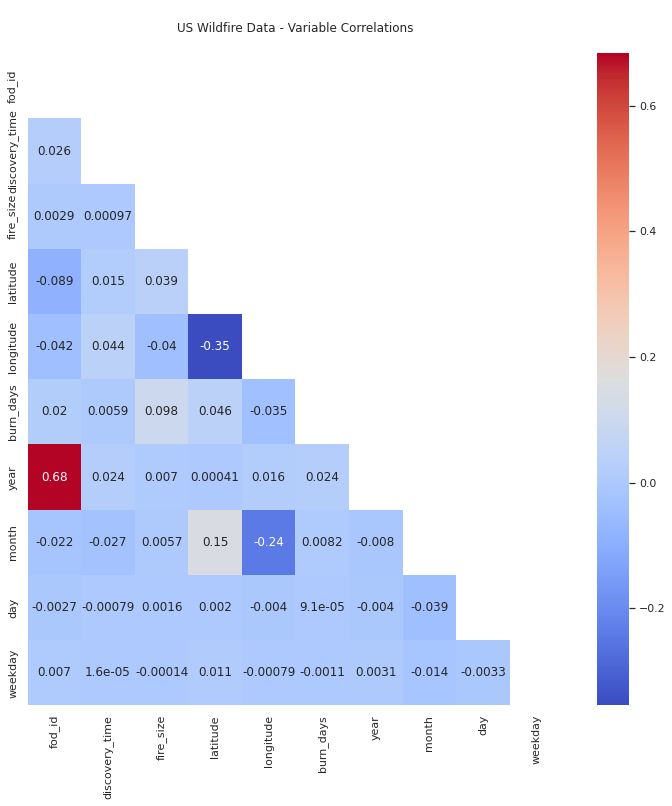

In [ ]:
half_masked_corr_heatmap(fires_df, 'US Wildfire Data - Variable Correlations')

**Analysis** Since there are no meaningful variable other than 'fire_size', no significant correlation was expected.  But we do make some intereting observations:
* Relatively 'strong' correlation is observed between 'fod_id' (global unique wildfire identifier code) and the 'year' which probably indicates that fod_id formulation is somehow related to the fire start 'year'.  Since 'fod_id' is ordinal value, the correlation CANNOT be considered significant.
*  Another interesting observation is the correlation between 'longitute' & 'latitude' which is probable indication that the wildfires occur repeatedly in same areas. 

However, the general finding is that there is NO statistically significant correlation between these variables. 

### **Wildfire Distribution**
Next we examine the distribution of wildfires by its size (burn area) using a box plot.  

In [ ]:
# box plot to 

fig_box = px.box(fires_df, x="fire_size",
                 notched=True, # used notched shape
                 title="Box Plot: Fire Size Distribution",
             hover_data=["fire_size"],
             labels={"fire_size": "Fire Size in Acres"},
             width=800, height=400
            )
fig_box.show()

Output hidden; open in https://colab.research.google.com to view.

**Explanation**: The box chart representation is neither succint nor clear which is probably due to the highly skewed wildfire distribution towards the smaller fires.  

For better presentation of wildfire distribution, we employee the bar charts.

In [ ]:

df1 = fires_df.groupby(["fire_size_class"]).count().reset_index()

fig = px.bar(df1,
             y="fire_size",
             x="fire_size_class",
             color='fire_size_class',
             title='Number of Wildfire Distribution by Class',
             width=800, height=400,
             labels={"fire_size_class": "Fire Size Class",
                     "value" : "Count",
                     'fire_size': 'Number of Wildfires'})

fig.for_each_trace(lambda t: t.update(name = fire_size_class_label[t.name],
                                      legendgroup = fire_size_class_label[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, fire_size_class_label[t.name])
                                     ))
fig.show()

**Explanation**:  In the bar chart representation, we sort the number of wildfires by the 'Fire Size Class' category.  The result is an improvement from the box plot.  But it fails to show the distribution of wildfires by the "fire burn area".

In [ ]:

df1 = fires_df.groupby(["fire_size_class"]).sum().reset_index()

fig = px.bar(df1,
             y="fire_size",
             x="fire_size_class",
             color='fire_size_class',
             title='Wildfire Burn Area Distribution by Class',
             width=800, height=400,
             labels={"fire_size_class": "Fire Size Class",
                     "value" : "Count",
                     'fire_size': 'Wildfire Burn Area'})

fig.for_each_trace(lambda t: t.update(name = fire_size_class_label[t.name],
                                      legendgroup = fire_size_class_label[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, fire_size_class_label[t.name])
                                     ))
fig.show()

**Explanation**: Contrary to the number of wildfire distribution where the distribution is skewed towards the smaller size fires, the "fire burn area" distribution is highly skewed towards the large fires.  Although the bar chart is an improvement from the box chart, it fails to convey the percentage distribution.  For this we will employ the pie charts.

For the pie chart plotting, we first begin by refining and naming the data in the required form:

In [ ]:
# the number of fires grouped by the fire class size, and the normalization (the percentage breakdown) of the data.
fire_sc_c = fires_df.fire_size_class.value_counts()
fire_sc_p = fires_df.fire_size_class.value_counts(normalize=True)

print(fire_sc_c, "\n \n", fire_sc_p)

B    939376
A    666919
C    220077
D     28427
E     14107
F      7786
G      3773
Name: fire_size_class, dtype: int64 
 
 B    0.499545
A    0.354656
C    0.117033
D    0.015117
E    0.007502
F    0.004140
G    0.002006
Name: fire_size_class, dtype: float64


In [ ]:
# breakdown of wildfires by bured areas by the fire size class
fire_burn_size = fires_df.groupby('fire_size_class')['fire_size'].sum()
fire_burn_size

fire_size_class
A    7.923065e+04
B    2.016839e+06
C    6.279218e+06
D    4.599518e+06
E    7.234844e+06
F    1.658726e+07
G    1.033356e+08
Name: fire_size, dtype: float64

In [ ]:
# two pie charts - one for the wildfire counts & another for the burned area broken down by the fire size class 
fig_pie2 = px.pie(values = fire_sc_c, 
                 names = fire_size_class_label, 
                 title="Number of Wildfires by Fire Class Size ",
                 hole=.3)
fig_pie2.update_layout(width=700, height=500, legend_traceorder="normal")
fig_pie2.update_traces(hovertemplate = "Fire Size Class:%{label}: <br>Count: %{value}")
fig_pie2.show()



In this pie chart, we see the frequency of wildfire distribution by percentage as well as the acutal number of wildfires in each fire size class by hovering over the data which is an improvement over the bar chart.

In [ ]:
fig_pie = px.pie(values = fire_burn_size, 
                 names = fire_size_class_label, 
                 title="Wildfire Burned Area by Fire Class Size",
                 hole=.3)
fig_pie.update_layout(width=700, height=500, legend_traceorder="reversed")
fig_pie.update_traces(hovertemplate = "Fire Size Class:%{label}: <br>Burn Area in Acres: %{value}"
)
fig_pie.show()

Similarly, the wildfire distribution by the burned area shows the percentage as well as the actual number. 

Simple wildfire distribution is best represented in this case by the pie charts which conveys both the actual count  as well as the percentage distributions.

**Analysis -** Fire Size Class A and B contitutes 50% and 35.5% of the total *number* of wildfires.  However, the two classes as measured by the *burned area* combined constitute less than 2% of the total burned area.  Conversely, Fire Size Class G which is about 0.2% of the total number of fires constitutes almost three-quarters of all burned area.  

Clearly, the Fire Size Classification is a powerful discerning factor in this dataset.

## **Questions & Answers**




### **Question #1** Which is the largest fire in record for the dataset?


In [ ]:
#using sort_values() function to find the fires with largest burn area
top5_fires=fires_df.sort_values(by='fire_size', axis=0, ascending=False).head()
top5_fires

,fod_id,fire_name,discovery_date,discovery_time,stat_cause_descr,cont_date,fire_size,fire_size_class,latitude,longitude,state,county,burn_days,year,month,day,weekday
211296,214278,INOWAK,1997-06-25,1841.0,Lightning,1997-09-09,606945.0,G,61.982700,-157.085700,AK,UNKNOWN,76.0,1997,6,25,2
1579574,201508655,LONG DRAW,2012-07-08,1800.0,Lightning,2012-07-30,558198.3,G,42.391894,-117.893687,OR,Malheur,22.0,2012,7,8,6
1459664,20026006,WALLOW,2011-05-29,1500.0,Campfire,2011-07-12,538049.0,G,33.606111,-109.449722,AZ,UNKNOWN,44.0,2011,5,29,6
305585,311398,BOUNDARY,2004-06-13,1345.0,Lightning,2004-09-30,537627.0,G,65.266300,-146.885800,AK,UNKNOWN,109.0,2004,6,13,6
1215267,1472465,MINTO FLATS SOUTH,2009-06-21,1221.0,Lightning,2009-09-11,517078.0,G,64.746700,-149.504700,AK,UNKNOWN,82.0,2009,6,21,6


In [ ]:

df1 = top5_fires

fig = px.bar(df1,
             y="fire_size",
             x='fire_name',
             color='fire_size',
             color_continuous_scale='Inferno_r',
             title='Top Five Largest Wildfires in 1992~2015',
             width=600, height=400,
             labels={"fire_size": "Fire Burn Area",
                     "value" : "Count",
                     'fire_name': 'Wildfire Name'})
fig.update(layout_coloraxis_showscale=False)
fig.update_traces(width=.5)
fig.show()

>**Answer to Q1:** "Inowak" fire of 1997 in Alaska is the largest fire in the (dataset) record which burned 609,945 acres.  The second largest is "Long Draw" of 2012 in Oregon, burning about 557,200 acres. 

### **Question #2** - On what month of the year are wildfires most frequent?

Working with a large dataset such as our dataframe, which contains approximately 1.88 million rows, can be resource-intensive. Therefore, we will start by refining the existing dataframe and filtering out the information that is relevant to our analysis.

In [ ]:
#distillation by month & fire size class
fire_by_month_df = (
    fires_df.groupby(['month','fire_size_class'])['fire_size']
    .aggregate(['count','sum'])
    .reset_index()
    .rename(columns={"count": "fire_count", "sum":"burned_area"}))
fire_by_month_df.head()

,month,fire_size_class,fire_count,burned_area
0,1,A,21972,2695.44580
1,1,B,57820,134726.08076
2,1,C,14595,384083.38300
3,1,D,1322,208019.05998
4,1,E,505,249032.18000


In [ ]:
# scatter plot w/ logscale y-axis
symbols = ['square', 'pentagon', 'diamond' , 'cross' , 'x' , 'triangle-up' , 'circle']

fig = px.scatter(fire_by_month_df, 
                 x='month', 
                 color='fire_size_class', 
                 y='fire_count',
                 size = 'burned_area',
                 symbol = 'fire_size_class',
                 symbol_sequence=symbols,
                 log_y=True,
                 title='Wildfires Frequency & Scale by Month',
                 labels=dict(month='Month', fire_count='Count', fire_size_class='Fire Size Class')
                 )

fig.for_each_trace(lambda t: t.update(name = fire_size_class_label[t.name],
                                      legendgroup = fire_size_class_label[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, fire_size_class_label[t.name])))

fig.update_yaxes(range=(0,5.7), constrain='domain')

fig.update_layout(width=900, height=600)


fig.show()



>**Answer to Q2** - Small wildfires (Class A to E) appear to be evenly distributed throughout the months, with the exception of the summer months. During this period, large fires (Class ㄹ & G) tend to start in May and peak over the following three months. This could be because small wildfires are often engulfed by large ones during the summer months.

### **Question #3** - Which states were most effected by the wildfires?

We will limit our scope of analysis to large scale fires (Class F & G) in terms of number and the burned area. 

In [ ]:
lg_fires_df = fires_df.loc[fires_df['fire_size_class'].isin(["F","G"])].reset_index()
lg_fires_df.head()

,index,fod_id,fire_name,discovery_date,discovery_time,stat_cause_descr,cont_date,fire_size,fire_size_class,latitude,longitude,state,county,burn_days,year,month,day,weekday
0,16,17,POWER,2004-10-06,1415.0,Equipment Use,2004-10-21,16823.0,G,38.523333,-120.211667,CA,5,15.0,2004,10,6,2
1,17,18,FREDS,2004-10-13,1618.0,Equipment Use,2004-10-17,7700.0,G,38.780000,-120.260000,CA,17,4.0,2004,10,13,2
2,188,192,THREE,2005-06-21,1400.0,Lightning,2005-06-29,16100.0,G,33.723333,-111.275000,AZ,7,8.0,2005,6,21,1
3,548,556,NINE,2005-07-09,1313.0,Miscellaneous,2005-07-10,1149.0,F,35.688056,-118.438333,CA,UNKNOWN,1.0,2005,7,9,5
4,582,590,OAK,2005-07-16,1720.0,Lightning,2005-07-20,1300.0,F,33.933611,-111.379722,AZ,7,4.0,2005,7,16,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11554,1878523,300338871,HUMBOLDT,2008-06-11,1214.0,Arson,2008-07-13,23344.0,G,39.762464,-121.736696,CA,UNKNOWN,32.0,2008,6,11,2
11555,1878988,300340902,TASSAJARA,2015-09-19,1500.0,Missing/Undefined,2015-09-27,1100.0,F,36.391049,-121.595123,CA,UNKNOWN,8.0,2015,9,19,5
11556,1879336,300342585,MORGAN,2013-09-08,1309.0,Miscellaneous,2013-09-08,3100.0,F,37.904877,-121.874159,CA,UNKNOWN,0.0,2013,9,8,6
11557,1879800,300344916,SWEDES,2013-08-16,1639.0,Equipment Use,2013-08-28,2264.0,F,39.443241,-121.433033,CA,UNKNOWN,12.0,2013,8,16,4


In [ ]:
# creating a new df grouped by 'state'
fire_by_states_df = (
    fires_df.groupby(['state'])['fire_size']
    .aggregate(['count','sum'])
    .reset_index()
    .rename(columns={"count": "fire_count", "sum":"burned_area"}))
fire_by_states_df.head()

,state,fire_count,burned_area
0,AK,12843,3.223309e+07
1,AL,66570,9.205453e+05
2,AR,31663,5.089118e+05
3,AZ,71586,5.576681e+06
4,CA,189550,1.274586e+07


In [ ]:
#based on the refined df, 'firby_states_df' we further filter to find the answer
state_max_fire_num = fire_by_states_df.loc[fire_by_states_df['fire_count'] == (fire_by_states_df['fire_count'].max())]
state_max_fire_area = fire_by_states_df.loc[fire_by_states_df['burned_area'] == (fire_by_states_df['burned_area'].max())]

print("The state with the most number wildfires is ", abbrev_to_us_state[state_max_fire_num.iat[0,0]], " with ", "{:,}".format(state_max_fire_num.iat[0,1]), " fires.")
print("The state with the most wildfire burned area is ", abbrev_to_us_state[state_max_fire_area.iat[0,0]], " with ", "{:,.0f}".format(state_max_fire_area.iat[0,2]), " acres.")

The state with the most number wildfires is  California  with  189,550  fires.
The state with the most wildfire burned area is  Alaska  with  32,233,094  acres.


>**Answer to Q3 - Simple Answers** are as below:

> * The state with the most number wildfires is  California  with  189,550  fires.
> * The state with the most wildfire burned area is  Alaska  with  32,233,094  acres.

However, if one wants to have broad and comprehensive overview of the question - "which states (note the plural) suffers the most...?" - then the simple answer above may seem inadequate.  Hence we employ a heatmap to show the occurances of wildfires by states:

A list of the US state capitals with longitude & latitude along with the capital name is imported from Github.  This file will be merged with the existing dataset to map the states on the US map.  

In [ ]:
import pandas as pd
# importing the US capitol longitude & latitue in csv format from github 
us_state_cap_loc = pd.read_csv("https://raw.githubusercontent.com/jasperdebie/VisInfo/master/us-state-capitals.csv")
us_state_cap_loc.head()

,name,description,latitude,longitude
0,Alabama,Montgomery,32.377716,-86.300568
1,Alaska,Juneau,58.301598,-134.420212
2,Arizona,Phoenix,33.448143,-112.096962
3,Arkansas,Little Rock,34.746613,-92.288986
4,California,Sacramento,38.576668,-121.493629


In [ ]:
us_state_cap_loc['state'] = us_state_cap_loc['name'].map(us_state_to_abbrev)
us_state_cap_loc.drop('name', axis=1, inplace=True)
us_state_cap_loc.head()

,description,latitude,longitude,state
0,Montgomery,32.377716,-86.300568,AL
1,Juneau,58.301598,-134.420212,AK
2,Phoenix,33.448143,-112.096962,AZ
3,Little Rock,34.746613,-92.288986,AR
4,Sacramento,38.576668,-121.493629,CA


In [ ]:
fire_by_states_df = fire_by_states_df.merge(us_state_cap_loc, how='right', on='state')
fire_by_states_df.head()

,state,fire_count,burned_area,description,latitude,longitude
0,AL,66570,9.205453e+05,Montgomery,32.377716,-86.300568
1,AK,12843,3.223309e+07,Juneau,58.301598,-134.420212
2,AZ,71586,5.576681e+06,Phoenix,33.448143,-112.096962
3,AR,31663,5.089118e+05,Little Rock,34.746613,-92.288986
4,CA,189550,1.274586e+07,Sacramento,38.576668,-121.493629


In [ ]:

df = fire_by_states_df


df['text'] = (df['state'] + '<br>' + df['fire_count'].apply(lambda x: "{:,.0f}".format(x)).astype(str))

fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = df['longitude'],		
        lat = df['latitude'],
        text = df['text'],
#        animation_frame="year",
        marker = dict(
            opacity = 0.8,
            reversescale = False,
            autocolorscale = False,
            size= df['fire_count']/100,
            sizemode = 'area',
            line = dict(
                width=1,
                color='red'
            ),
            colorscale = 'rdbu',
            cmin = 0,
            color = df['fire_count'],
            cmax = df['fire_count'].max(),
            colorbar_title="Number of Wildfires"
        )))

fig.update_layout(
        title = 'Number of US Wildfires by States (1992~2015)' + '<br>(Hover over State Capital)',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )
fig.show()

In [ ]:
import plotly.graph_objects as go
    
df = fire_by_states_df


df['text'] = (df['state'] + '<br>' + df['burned_area'].apply(lambda x: "{:,.0f}".format(x)).astype(str) + ' acres')


fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = df['longitude'],		
        lat = df['latitude'],
        text = df['text'],
        marker = dict(
            opacity = 0.8,
            reversescale = False,
            autocolorscale = False,
            size= df['burned_area']/500000,
            line = dict(
                width=1,
                color='red'
            ),
            colorscale = 'rdbu',
            cmin = 0,
            color = df['burned_area'],
            cmax = df['burned_area'].max(),
            colorbar_title="Wildfire Burn Areas"
        )))

fig.update_layout(
        title = 'US Wildfires Burned Area by the States (1992~2015)' + '<br>(Hover over State Capital)',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )
fig.show()

>**Answer to Q3**:  Observation of the 'Number of US Wildfires by States (1992~2015)' reveals that states with South and Southwestern - California, Texas, Floria, Georgia - experienced the most number of wildfires which are mostly small in scale - Class A & B, mostly.  However, when the wildfires as measured by the burn area, states like Alaska, California, Idaho, Oregon & Nevada which have large forested areas suffer the most. 

### **Question #4** - Do we observe an increase in  large scale wildfires?

In particular, do we observe any notable trend in the nummber and scale of large wildfires (Class G) during the period? 


In [ ]:
# further breakdown of the fire counts by year
fire_class_count = fires_df.groupby('year')['fire_size_class'].value_counts()
fire_class_count.to_frame()
fire_class_count.unstack()

fire_size_class,A,B,C,D,E,F,G
year,,,,,,,
1992,25540,32981,7955,876,368,197,58
1993,20765,32196,7573,831,397,159,65
1994,27902,36824,8833,1182,668,403,146
1995,23913,36864,8923,1005,473,225,69
1996,25120,37846,10118,1220,695,374,201
1997,21664,31946,6720,678,267,114,61
1998,23408,35465,7931,896,405,189,76
1999,27562,47819,11477,1322,658,370,155
2000,33063,48113,12108,1570,834,483,245


In [ ]:
# histogram of the numbers of fires over time, grouped by fire class size
fig_histo = px.histogram(fires_df, 
                         x='year',       
                         color = 'fire_size_class',
                         nbins = 24,
                         title='Wildfire Count by Size Class from 1992 to 2015',
                         labels=dict(year='Year', count='Count', fire_size_class='Fire Size Class'),
                         category_orders={"fire_class_size": ["A", "B", "C", "D","E","F","G"]})
fig_histo.update_layout(bargap=0.1, legend_traceorder="normal", width=1000, height=400)
fig_histo.update_yaxes(title_text='Number of Wildfires')
fig_histo.for_each_trace(lambda t: t.update(name = fire_size_class_label[t.name],
                                            legendgroup = fire_size_class_label[t.name],
                                            hovertemplate = t.hovertemplate.replace(t.name, fire_size_class_label[t.name])))

fig_histo.show()

Output hidden; open in https://colab.research.google.com to view.

**Answer to Q4:**   
When the number of wildfires is observed over the period, there is slight up & down but does NOT seem to be any obvious trend.

In [ ]:
# histogram over the burned area over time, grouped by fire class size
fig_histo_area = px.histogram(fires_df, 
                              x='year',
                         y='fire_size',                          
                         color = 'fire_size_class',
                         nbins = 24,
                         title='Wildfire Burn Area by Size Class from 1992 to 2015',
                         labels=dict(year='Year', fire_size_class='Fire Size Class'))
fig_histo_area.update_layout(bargap=0.1, width=1000, height=400)
fig_histo_area.update_yaxes(title_text='Burned Area in Acres')
fig_histo_area.for_each_trace(lambda t: t.update(name = fire_size_class_label[t.name],
                                            legendgroup = fire_size_class_label[t.name],
                                            hovertemplate = t.hovertemplate.replace(t.name, fire_size_class_label[t.name])))

fig_histo_area.show()

Output hidden; open in https://colab.research.google.com to view.

However, for large wildfires like Class G which constitue about three quarters of all burned area, there may be a trend although not definitive.  We will calculate the average fire size for each class and plot to see if there is a trend.

In [ ]:
# create a few df with sum of fires and the sum of burned area by class & year
fire_avg_size = fires_df.groupby(['year','fire_size_class'])['fire_size'].mean()
fire_avg_size = fire_avg_size.unstack(level='fire_size_class')
fire_avg_size

fire_size_class,A,B,C,D,E,F,G
year,,,,,,,
1992,0.118297,2.214511,28.105789,158.391724,512.508451,1992.226904,20353.368966
1993,0.119390,2.199706,27.404383,161.037918,514.385390,2183.286792,18856.686154
1994,0.118805,2.158418,28.717380,164.579382,533.601213,2067.602730,16410.939041
1995,0.121576,2.222408,28.114370,161.144905,517.574841,2012.045333,12382.792754
1996,0.118167,2.251270,28.593878,163.606131,503.186906,2146.739492,21271.034826
1997,0.119907,2.188999,27.349659,158.559381,519.884644,2150.181579,40440.737705
1998,0.121190,2.230535,27.442808,161.418951,517.786420,2145.642328,12521.703816
1999,0.123347,2.319596,27.746395,160.576210,514.524468,2079.755541,27916.680645
2000,0.116193,2.306268,28.408859,161.621236,517.940492,2093.059627,22383.940812


In [ ]:
fig = px.scatter(fire_avg_size, 
              y='G', 
              x=fire_avg_size.index, 
              title='Average Burn Area per Wildfire - Fire Size Class G ( >5,000 acres)',
              trendline="ols",
              trendline_color_override="red",
              labels={"value" : "Average Burn Area in Acres",
                     'year': 'Year',
                     'fire_size_class' : 'Fire Size Class'})


fig.show()


results = px.get_trendline_results(fig)
#results.query("fire == 'Male' and smoker == 'Yes'").px_fit_results.iloc[0].summary()
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     2.107
Date:                Mon, 13 Mar 2023   Prob (F-statistic):              0.161
Time:                        05:18:08   Log-Likelihood:                -254.32
No. Observations:                  24   AIC:                             512.6
Df Residuals:                      22   BIC:                             515.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.403e+05   5.97e+05     -1.407      0.173   -2.08e+06    3.98e+05
x1           432.6932    298.086      1.452      0.161    -185.500    1050.887
==============================================================================
Omnibus:                       25.861   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.901
Skew:                           2.101   Prob(JB):                     1.78e-10
Kurtosis:                       8.219   Cond. No.                     5.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

>**Answer to Q4** Whether there is a trend in the number of fires over the observed period is inconclusive.  If, however, whether there is an observable trend in the average size of large wildfires (Fire Size Class G), one definitely see an increasing trend.  Base on the p-value of 0.173, others may argue that it may not have strong statistical significance.  Further study over longer period of time or/and addition of wildfires from other countries may yield more conclusive answer.  

### **Question #5**. What are the major fire start causes of wildfires?

Instead of working with the large dataset directly, the data of our interest has been distilled from the main dataframe to create a new dataframe as shown below:

In [ ]:
fire_cause = fires_df.groupby('fire_size_class')['stat_cause_descr'].value_counts()
fire_cause.to_frame()
fire_cause_df = fire_cause.unstack(level='stat_cause_descr')
fire_cause_df = fire_cause_df.transpose()
fire_cause_df

fire_size_class,A,B,C,D,E,F,G
stat_cause_descr,,,,,,,
Arson,61919,154181,55913,6239,2276,772,155
Campfire,44215,25911,5002,557,235,133,86
Children,26732,31489,2576,218,100,42,10
Debris Burning,95778,272347,54653,4263,1410,462,115
Equipment Use,53126,73377,16580,2493,1266,571,199
Fireworks,6054,4356,746,176,115,47,6
Lightning,152396,85802,24325,5773,4291,3462,2419
Miscellaneous,134441,152090,29189,4398,2146,1125,416
Missing/Undefined,52868,86781,21269,3012,1662,878,253


In [ ]:
fig_bar_causes = px.bar(fire_cause_df, 
                        x=fire_cause_df.columns, 
                        title="Fire Cause Distribution by Fire Size Class",
                        labels={"fire_size_class": "Fire Size Class",
                               "value" : "Count",
                               "stat_cause_descr" : "Causes of Fire"})
fig_bar_causes.show()

Using a bar chart, we show the causes of fire.  However, due to a large data skewing towards the small size fires, the bar graph does not seem to convey the information clearly, especially for the large fire size classes.

**Heatmap Representation of the Fire Causes** - we will use the heatmap to convey pertinent information about the fire start causes:

In [ ]:
#heatmap of the fire causes as % of total
fig_hm3 = px.imshow(fire_cause_df.round(2), 
                   x=fire_cause_df.columns, 
                   y=fire_cause_df.index,
                   color_continuous_scale='YlGnBu',
                   labels=dict(y="Causes of Fires", x="Fire Size Class", color="Fire Size Class"), 
                   title='Heatmap of the Fire Causes by Fire Class Size',
                   text_auto=True,
                   height = 800,
                   width = 800)
fig_hm3.show()

In this heatmap, we show actual count of the wildfires to the causes of the fire.  Although it is an improvement, a better method may be required to present both the actual count as well as the percentage breakdown by fire size class to convey the fire causes for each size class. 

In [ ]:
# we transform the dataframe to percentage breakdown relative to the total of fire size class
fire_cause_pct_df = fire_cause_df.div(fire_cause_df.sum(axis=0), axis=1)
fire_cause_pct_df.style.format("{:.1%}")

fire_size_class,A,B,C,D,E,F,G
stat_cause_descr,,,,,,,
Arson,9.3%,16.4%,25.4%,21.9%,16.1%,9.9%,4.1%
Campfire,6.6%,2.8%,2.3%,2.0%,1.7%,1.7%,2.3%
Children,4.0%,3.4%,1.2%,0.8%,0.7%,0.5%,0.3%
Debris Burning,14.4%,29.0%,24.8%,15.0%,10.0%,5.9%,3.0%
Equipment Use,8.0%,7.8%,7.5%,8.8%,9.0%,7.3%,5.3%
Fireworks,0.9%,0.5%,0.3%,0.6%,0.8%,0.6%,0.2%
Lightning,22.9%,9.1%,11.1%,20.3%,30.4%,44.5%,64.1%
Miscellaneous,20.2%,16.2%,13.3%,15.5%,15.2%,14.4%,11.0%
Missing/Undefined,7.9%,9.2%,9.7%,10.6%,11.8%,11.3%,6.7%


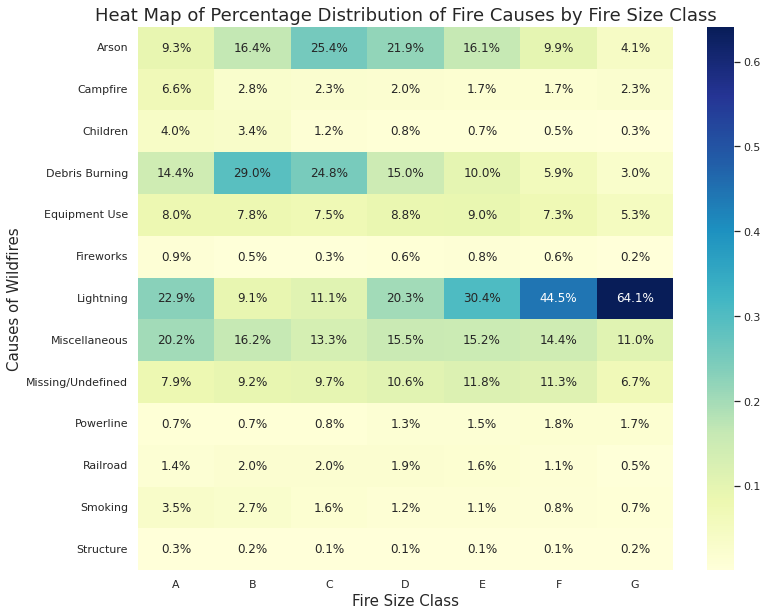

In [ ]:
#heatmap of the fire causes as % of total
sns.set(rc = {'figure.figsize':(12,10)})
fig_hm2 = sns.heatmap(data = fire_cause_pct_df,
                      annot=True, 
                      annot_kws={"size": 12}, 
                      cmap="YlGnBu", 
                      fmt='.1%')
plt.title("Heat Map of Percentage Distribution of Fire Causes by Fire Size Class", fontsize =18)
plt.ylabel('Causes of Wildfires', fontsize = 15) # x-axis label with fontsize 15
plt.xlabel('Fire Size Class', fontsize = 15) # y-axis label with fontsize 15
plt.show()

With this heatmap of percentage distribution of wildfire causes relative to its fire size class, one has better understanding of the wildfire causes in each size class.  

>**Answer #5:** In most cases, the natural cause, i.e. 'Lighting', is the leading cause of wildfires for large scale wildfires. However, for the smaller scale wildfires, non-natural causes or human activity-induced fires (all other than 'Lighting' & some unspecified 'Misc') in aggregate are the leading cause.  

### **Question #6** Is California experiencing more wildfires than before? 

Going back to my original inquiry, are we experiencing more wildfires than before, interrupting my summer backpacking trips? 

Parks are closed only for the large wildfires but the small ones.  Hence the analysis will address only for the larger fires, i.e. Class F & G.

In [ ]:
cal_fire = fires_df.loc[fires_df.state == 'CA']
cal_fire = cal_fire.loc[cal_fire['fire_size_class'].isin(["F","G"])]
cal_fire = cal_fire.sort_values(by=['year']).reset_index()
cal_fire.drop(['index'], axis=1, inplace=True)
cal_fire.head()


,fod_id,fire_name,discovery_date,discovery_time,stat_cause_descr,cont_date,fire_size,fire_size_class,latitude,longitude,state,county,burn_days,year,month,day,weekday
0,48894,CACTUS,1992-05-31,1142.000000,Miscellaneous,1992-06-04,1150.0,F,33.666667,-116.953333,CA,UNKNOWN,4.0,1992,5,31,6
1,1369077,HOG #2,1992-07-17,1453.014326,Lightning,1992-07-31,1310.0,F,40.221944,-122.076111,CA,UNKNOWN,14.0,1992,7,17,4
2,47195,LOVELAND,1992-07-18,1409.000000,Campfire,1992-07-21,1550.0,F,32.790556,-116.736667,CA,UNKNOWN,3.0,1992,7,18,5
3,47322,CLEVELAND,1992-09-29,1240.000000,Miscellaneous,1992-10-12,24580.0,G,38.775000,-120.450000,CA,UNKNOWN,13.0,1992,9,29,1
4,47439,RAINBOW,1992-08-20,1430.000000,Lightning,1992-09-16,8800.0,G,37.550000,-119.095000,CA,UNKNOWN,27.0,1992,8,20,3


In [ ]:
# function to create a map with slider 
def fire_map_slider(df, zoom_level, title):
  df['text'] = (df['fire_name'] + ' of ' + df['year'].astype(str) + '<br>' 
                       + 'Fire Size Class: ' + df.fire_size_class + '(' 
                       + df['fire_size'].astype(int).astype(str) + ' acres)')

  fig = px.scatter_mapbox(df, 
                          lat="latitude", 
                          lon="longitude", 
                          color="fire_size", 
                          size='fire_size',
                          zoom = zoom_level, 
                          mapbox_style='open-street-map',
                          color_continuous_scale='rdbu',
                          animation_frame="year",
                          title=title,
                          width=900,
                          range_color=[0,500000],
                          labels={"fire_size": "Fire Size in Acres",
                               "value" : "Count"}
                          )
 
  fig.show()

In [ ]:
fire_map_slider(cal_fire, 4,"California Wildfire Occurrence from 1992~2015")

This graphic presentation looks really nice but does not answer our question clearly.  Hence we will examine the trendlines of average fire burn area.

In [ ]:
cal_fire_avg_size = cal_fire.groupby(['year','fire_size_class'])['fire_size'].mean()
cal_fire_avg_size = cal_fire_avg_size.unstack(level='fire_size_class')

cal_fire_avg_size.head(0)

fire_size_class,F,G
year,,


In [ ]:
fig = px.scatter(cal_fire_avg_size,
                 y= ['F', 'G'],
                 x= cal_fire_avg_size.index, 
                 title='California Avg Burn Area per Wildfire - Fire Size Class F & G',
                 trendline="ols",
#                 trendline_color_override="red",
                 trendline_scope = 'trace',
                 labels={"value" : "Average Burn Area in Acres",
                         'year': 'Year',
                         'variable' : 'Fire Size Class'})


fig.show()


The smaller of the two fire size class, Class F, is declining in the numbers but the larger fires, Class G, is increasing.  

Large scale wildfires are definitely getting larger in size!  

In [ ]:
cal_fire_count = cal_fire.groupby(['year','fire_size_class'])['fire_size'].count()
cal_fire_count = cal_fire_count.unstack(level='fire_size_class')


fire_size_class,F,G
year,,
1992,36,9
1993,21,12
1994,45,13
1995,29,10
1996,76,21
1997,22,12
1998,15,7
1999,50,25
2000,14,9


In [ ]:
fig = px.scatter(cal_fire_count,
                 y= ['F', 'G'],
                 x= cal_fire_count.index, 
                 title='Frequency of Wildfires in California - Fire Size Class F & G',
                 trendline="ols",
#                 trendline_color_override="red",
                 trendline_scope = 'trace',
                 labels={"value" : "Number of Wildfires",
                         'year': 'Year',
                         'variable' : 'Fire Size Class'})


fig.show()


As suspected, as wildfires are getting bigger in size, more of "what would have been classified as ClaSS F" in old days are now being classified as Class G.  


>**Answer #6:** Large wildfires in California are becoming more frequent and larger in size. What contributes to this observation?  The obvious guess is the global warming but it is beyond the scope of this analysis to make that argument. 


To further explore the ocurrence of large wildfires, below is an interactive presentation of large wildfire occurrence in the US in which one enters the year of interest (from 1992 to 2015) to see that year's wildfire occurence.  So how does your state's wildfires compare to ours in California? 

In [ ]:
lg_fires_df = fires_df.loc[fires_df['fire_size_class'].isin(["F","G"])].reset_index()
lg_fires_df

In [ ]:
fire_map_slider(lg_fires_df, 1.5,"US Wildfire Occurrence from 1992~2015")

## **Summary & Credits**


###**Insights**

* To make meaningful analyses of the data, it is important to distinguish between large-scale wildfires (defined as those with a perimeter greater than 1000 acres) and small-scale wildfires. While small wildfires constitute 99.5% of all wildfires in terms of occurrence, large wildfires account for 85% of all burned area.
* Wildfires occur throughout the year, but large-scale fires are more common in the summer, as expected. 
* Although it is difficult to discern the frequency of wildfires over the given period, the relative size of large wildfires seems to have steadily increased, possibly due to global warming. However, further studies based on longer historical data as well as data from other geographic locations are needed to draw more conclusive insights. 
* The major causes of wildfires can mostly be attributed to human-related activities such as arson, campfires, debris burning, and structures. However, lightning is the single most significant cause of large-scale wildfires, accounting for about 64% of them.
* *It is clear that scheduling my summer backpacking trip has become more challenging due to the increasing frequency of large wildfires.!!*


### **Future Works**
Longer historical data of wildfires as well as similar data from other countries merged together may yield answers to some interesting question such as 'What kind of effects does the global warming has on the wildfires?'.


### **Credits & Citations**
Obviously I want to thank the Jovian instructors who were there to assist me in completing this project.  Thank you!

In addition, there are simply too many online tutorial sites that I cannot possibly list them all here.  But I would like to specifically mention the following:
* www.plotly.com 
* www.geeksforgeeks.org
* www.stackoverflow.com
* pandas.pydata.com
* numpy.org
* Manu Kalia, "Handy Data Visualization Functions in matplotlib & Seaborn to Speed Up Your EDA" Jun 17, 2019 Medium https://betterprogramming.pub/handy-data-visualization-functions-in-matplotlib-seaborn-to-speed-up-your-eda-241ba0a9c47d

